# Song Popularity Dataset

Humans have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways.

Lately, multiple studies have been carried out to understand songs & it's popularity based on certain factors. Such song samples are broken down & their parameters are recorded to tabulate. Predicting the Song Popularity is the main aim.

* song_popularity is Song Popularity
* song_duration_ms is Song Duration (ms)
* time_signature is Time Signature
* audio_valence is Audio Valence

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Import the data

In [2]:
data = pd.read_csv("song_data.csv")

In [3]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


# Discover the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


* we have 15 columns and 18835 entries 
* the types of data are : Object , float , int

In [5]:
describtion = data.describe()
describtion

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


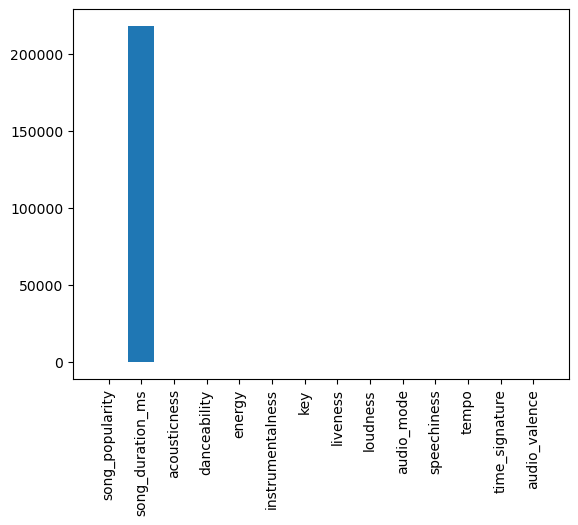

In [6]:
# describtion.loc['mean']
plt.bar(describtion.columns ,describtion.loc['mean'])
plt.xticks(rotation = 90)
plt.show()

the data is not on the same scale as we can see the huge difference between the song_duration_ms and the other columns

# Dealing with missing data and duplicated data and the outliers

In [7]:
# check if we have any missing data 
data.isnull().sum(axis=0)

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

the data is clean we do not have any missing data

In [8]:
# check the duplicated data

data.duplicated().sum()

3909

In [9]:
# lets drop the 3909 duplicated values
data.drop_duplicates(inplace=True)

# Visualize some data to better understand

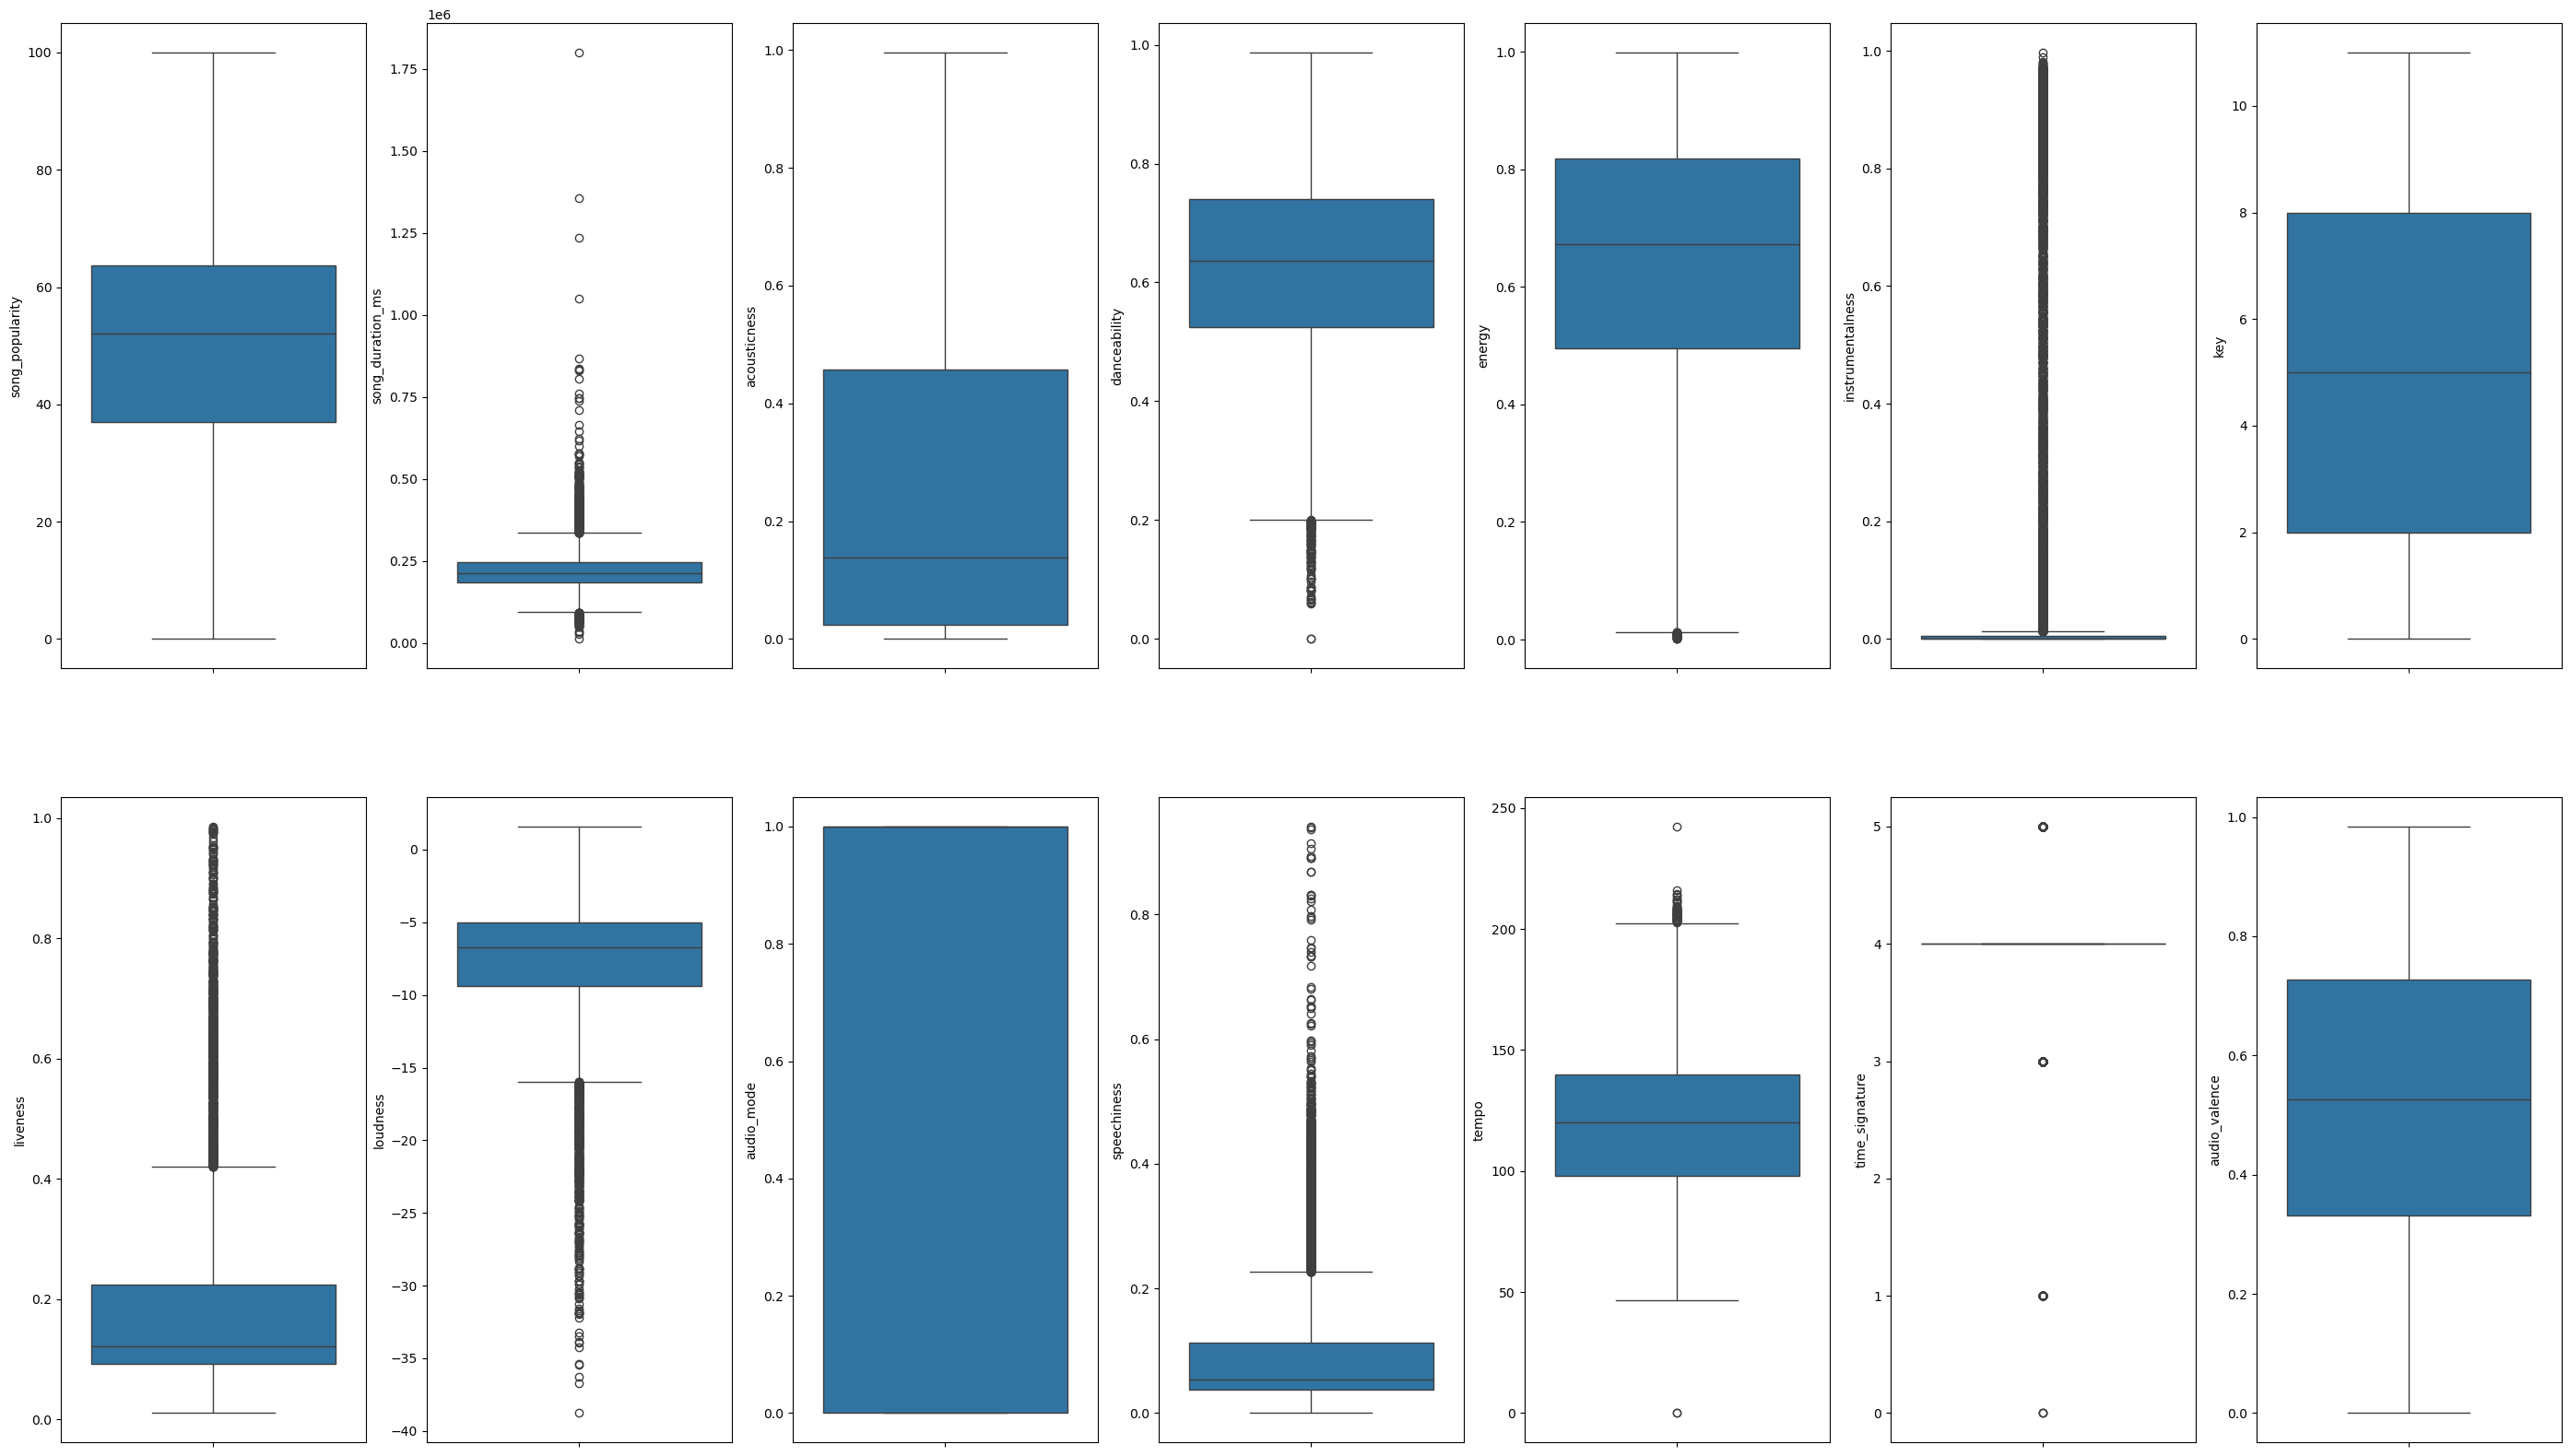

In [10]:
# plot the boxpolot
# changing the shape of the columns name to 2 dimentions to use them in the loop
# we have 15 columns but we dont want the "song name" becouse it is object
col_name = data.columns.drop('song_name')
nw_col_name = np.reshape(col_name,(2,7))
fig , axs = plt.subplots(2,7, figsize = (35,20))
for i in range(2):
    for j in range(7):
        sns.boxplot(data[nw_col_name[i,j]],ax=axs[i,j])

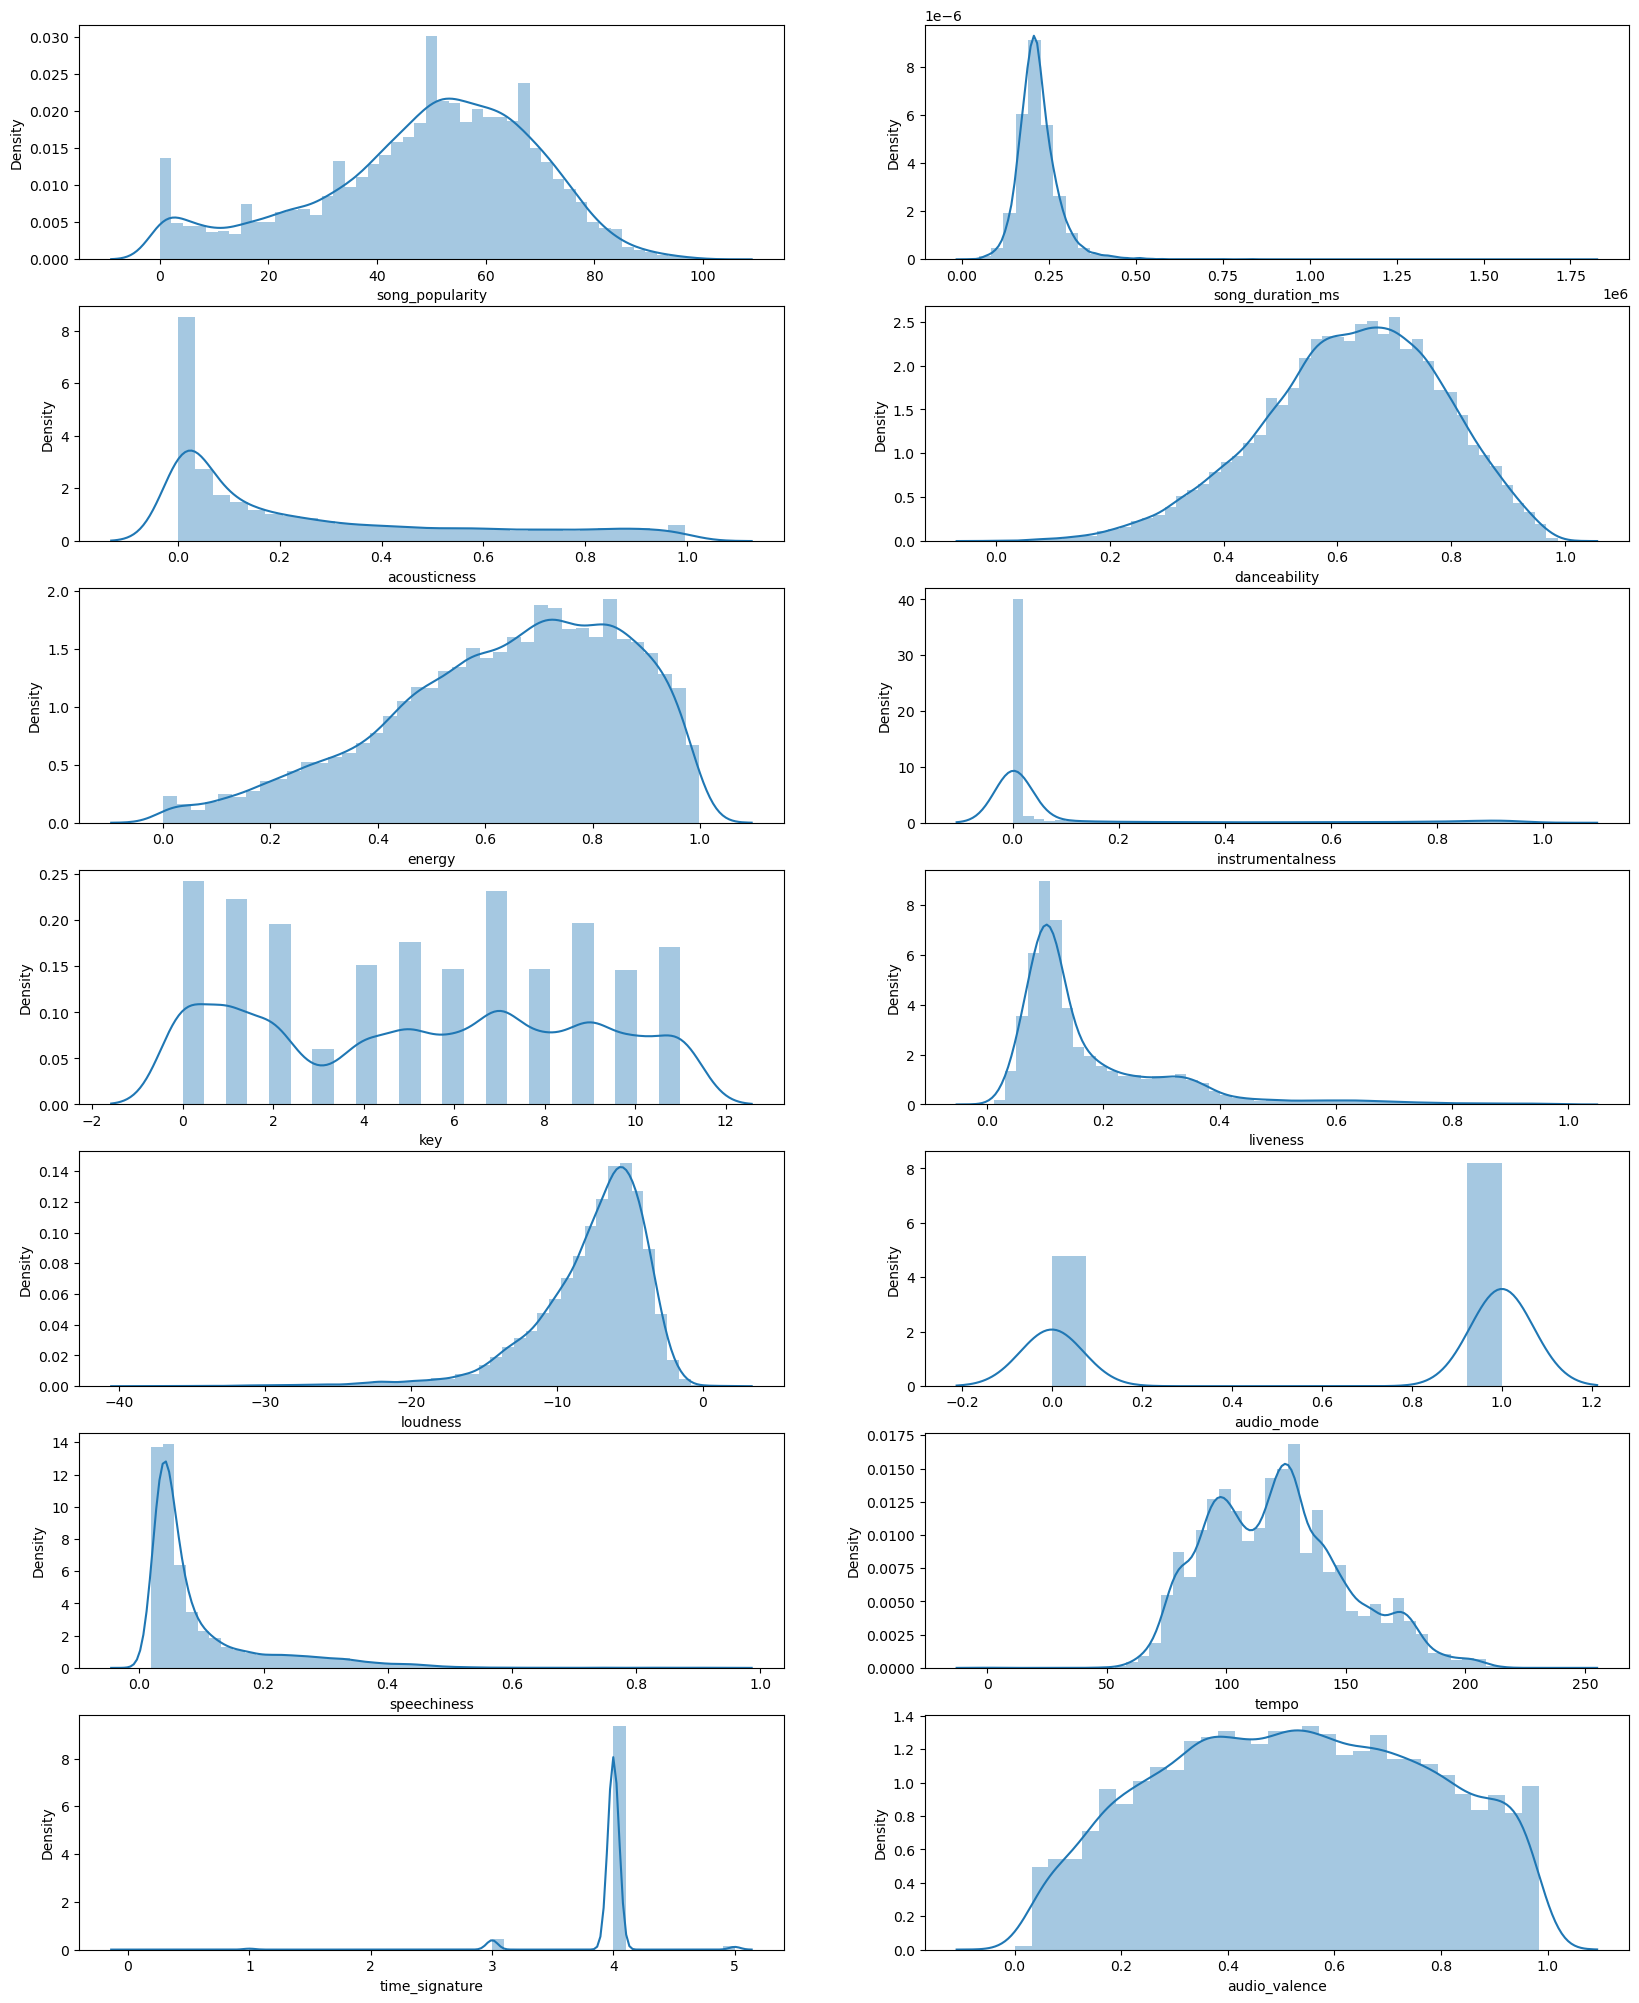

In [11]:
nw_col_name2 = np.reshape(col_name,(7,2))
fig , axs = plt.subplots(7,2, figsize = (20,25))
for i in range(7):
    for j in range(2):
        sns.distplot(data[nw_col_name2[i,j]],ax=axs[i,j])

# See the correlation and visualize it 

<Axes: >

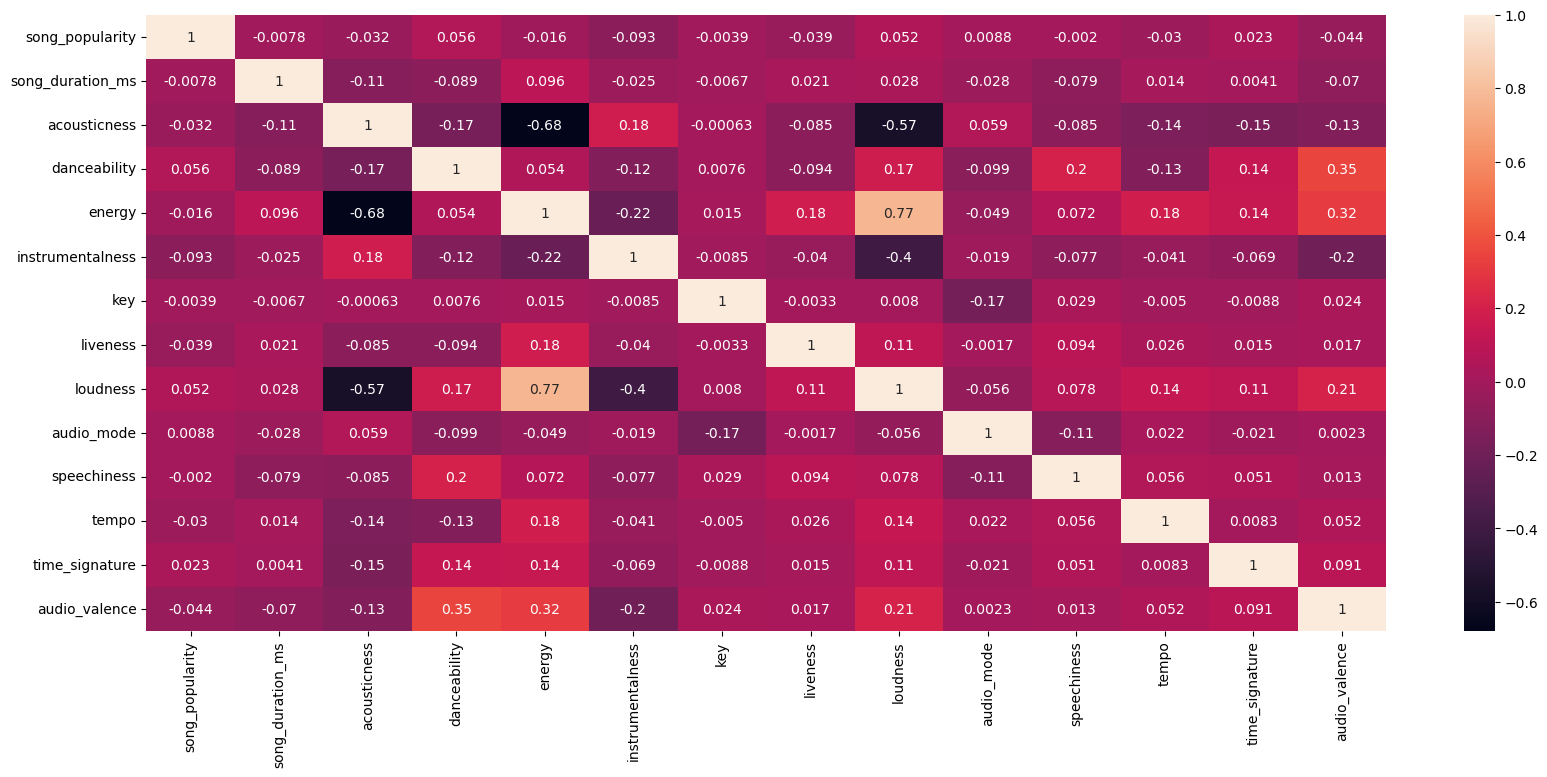

In [12]:
correlation = data.corr(numeric_only =True)

plt.figure(figsize = (20,8))
sns.heatmap(correlation, annot=True)

# Determin the independent data and the dependent(Target) data 

In [13]:
X = data.drop(['song_name','song_popularity'], axis = 1)
Y = data['song_popularity']

# Split the data

In [14]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size=0.3 , random_state=42)

In [15]:
print(f"the entries in the train data is {x_train.shape[0]} and in the test data is {x_test.shape[0]}")

the entries in the train data is 10448 and in the test data is 4478


# Scale the data

In [16]:
# i can merge this step with the model using pipeline but i will do it step by step

Scale = StandardScaler()

x_train_sc = Scale.fit_transform(x_train)

x_test_sc = Scale.transform(x_test)



# Linear Regression

In [17]:
lr = LinearRegression()

lr.fit(x_train_sc , y_train)

LinearRegression()

In [18]:
prediction1 = lr.predict(x_test_sc)

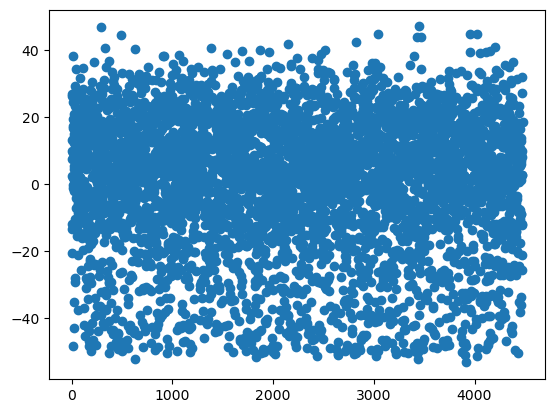

In [19]:
residual = y_test - prediction1
plt.scatter(range(len(residual)), residual)

we dont have unlinear correlation

# Random Forest Regression

In [20]:
Rfor = RandomForestRegressor()

Rfor.fit(x_train_sc , y_train)

RandomForestRegressor()

In [21]:
prediction2 = Rfor.predict(x_test_sc)

# Evaluate the model 

In [22]:
# the coefficient 
print("the coefficients in linear regression are")
for cof,feature in zip(lr.coef_,X.columns):

    print(f"the coefficient of {feature} is ----> {cof}")


the coefficients in linear regression are
the coefficient of song_duration_ms is ----> -0.12582236273353603
the coefficient of acousticness is ----> -0.8852487561893182
the coefficient of danceability is ----> 1.1316615763610947
the coefficient of energy is ----> -2.014402983567006
the coefficient of instrumentalness is ----> -1.6931999394057102
the coefficient of key is ----> 0.04524301643535514
the coefficient of liveness is ----> -0.5691299614201211
the coefficient of loudness is ----> 1.6689178562150224
the coefficient of audio_mode is ----> 0.15791556152201328
the coefficient of speechiness is ----> -0.4828218211591939
the coefficient of tempo is ----> -0.3540376252477701
the coefficient of time_signature is ----> 0.30085256662558574
the coefficient of audio_valence is ----> -1.3774225661617387


In [24]:
print(f"the R2score of the linear model is{r2_score(y_test, prediction1)} \nand the Mean Squared Error is {mean_squared_error(y_test, prediction1)} ")
print(50*('-'))
print(f"the R2score of the Random Forest is{r2_score(y_test, prediction2)} \nand the Mean Squared Error is {mean_squared_error(y_test, prediction2)} ")

the R2score of the linear model is0.023699448633969444 
and the Mean Squared Error is 401.30034951776304 
--------------------------------------------------
the R2score of the Random Forest is0.025886487139688774 
and the Mean Squared Error is 400.4013852433642 
